# **Module 2: Data Preprocessing**
### Prepared by: Ramchandra Rimal

## **Learning Objectives:**
- Basic overview of accessing data from web
- View summary of data
- Basic Visualization
- Check Missing values and Impute Missing Values
- Merge the data
- Create dummy variables 
- Melting and Pivoting

## Import necessary libraries

In [1]:
import pandas as pd  
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import datetime as dt
#import pandas_datareader.data as web

import warnings
warnings.filterwarnings('ignore')


In [79]:
# check the version of  main libraries 

print("Pandas Version:", pd._version_)

print("Numpy Version:",np._version_)

print("matplotlib Version:",matplotlib._version_)

print("Seaborn Version:", sns._version_)

#pip install --upgrade numpy
#pip install --upgrade matplotlib


AttributeError: module 'pandas' has no attribute '_version_'

In [2]:
#widen the notebook

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Extracting data from the web

In [3]:
start = dt.datetime(2021, 1, 26)
end = dt.datetime(2023, 8, 25)
ticker = 'TSLA'

#sometimes the pandas datareader not working
#data  =  web.DataReader(ticker, 'yahoo', start, end)[['Open','Close', 'Volume']]


In [4]:
#install yfinance

#!pip install yfinance

import yfinance as yf

In [5]:
#import data using yfinance

data  =  yf.download(ticker, start, end)[['Open','Close', 'Volume']]
data.head()

[*********************100%%**********************]  1 of 1 completed


Open       Close     Volume
Date                                         
2021-01-26  297.126678  294.363342   69394800
2021-01-27  290.116669  288.053345   82002000
2021-01-28  273.333344  278.476654   79134000
2021-01-29  276.666656  264.510010  104972400
2021-02-01  271.429993  279.936676   76174200

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.tail()

Open       Close     Volume
Date                                         
2023-08-18  214.119995  215.490005  135813700
2023-08-21  221.550003  231.279999  135702700
2023-08-22  240.250000  233.190002  130597900
2023-08-23  229.339996  236.860001  101077600
2023-08-24  238.660004  230.039993   99777400

## Statistical summary of the data

In [8]:
data.describe()
with pd.option_context('float_format', '{:.2f}'.format): print(data.describe()) 
# used with the with statement since don't want to change the whole settings but only apply for a particular output:


        Open  Close       Volume
count 650.00 650.00       650.00
mean  247.13 246.83  99267091.69
std    59.50  59.25  43696442.78
min   103.00 108.10  29401800.00
25%   205.30 206.27  67300125.00
50%   239.37 238.97  89557200.00
75%   285.03 286.16 120209250.00
max   411.47 409.97 306590600.00


In [9]:
data.describe().round(2)

Open   Close        Volume
count  650.00  650.00  6.500000e+02
mean   247.13  246.83  9.926709e+07
std     59.50   59.25  4.369644e+07
min    103.00  108.10  2.940180e+07
25%    205.30  206.27  6.730012e+07
50%    239.37  238.97  8.955720e+07
75%    285.03  286.16  1.202092e+08
max    411.47  409.97  3.065906e+08

In [10]:
pd.options.display.float_format = '{:,.2f}'.format # change whole setting to print two decimal places

data.describe()


Open  Close         Volume
count 650.00 650.00         650.00
mean  247.13 246.83  99,267,091.69
std    59.50  59.25  43,696,442.78
min   103.00 108.10  29,401,800.00
25%   205.30 206.27  67,300,125.00
50%   239.37 238.97  89,557,200.00
75%   285.03 286.16 120,209,250.00
max   411.47 409.97 306,590,600.00

<Figure size 640x480 with 0 Axes>

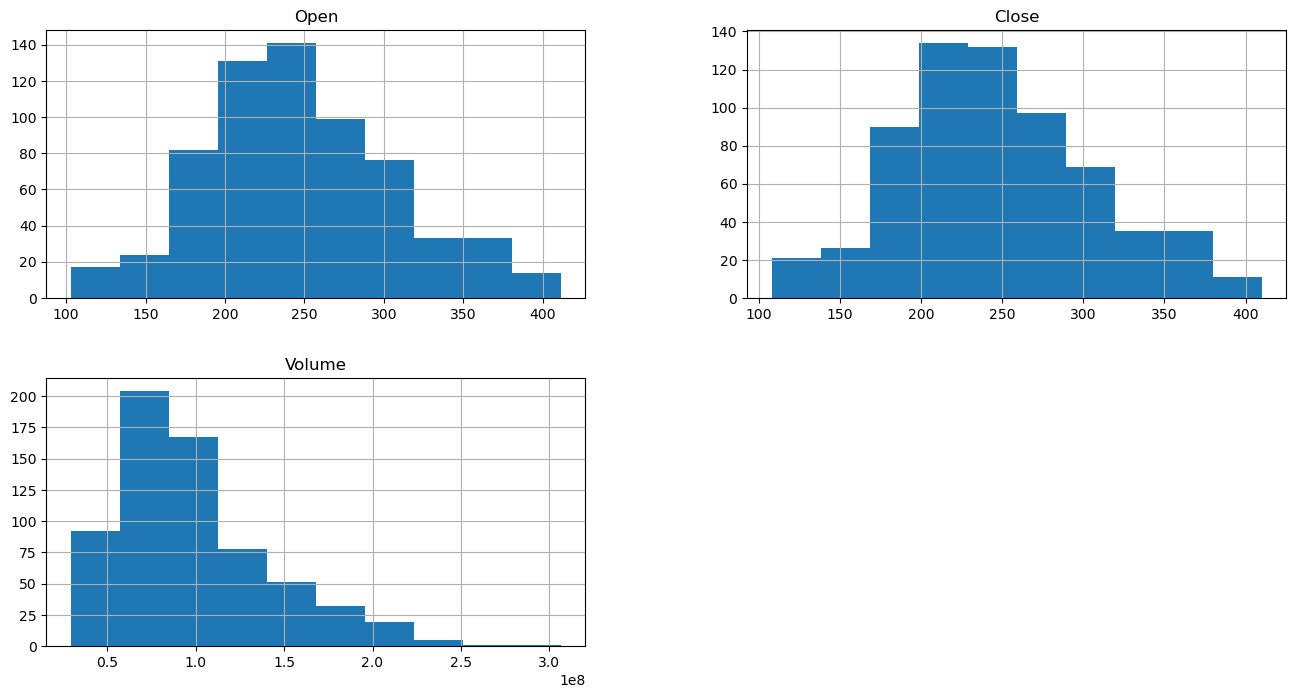

In [11]:
fig = plt.figure()
data.hist(figsize = (16,8))
#fig.savefig("histograms.png")
plt.show()

In [12]:
print(data.sample(10))

             Open  Close     Volume
Date                               
2021-05-18 189.33 192.62  110491800
2023-01-25 141.91 144.43  192734300
2021-08-11 237.57 235.94   29401800
2022-06-07 234.00 238.89   72808500
2023-04-03 199.91 194.77  169545900
2022-10-14 224.01 204.99   94124500
2022-06-03 243.23 234.52  112393800
2022-08-08 295.00 290.42   98994000
2022-08-11 296.51 286.63   70155000
2021-05-20 191.67 195.59   92463300


In [13]:
print("Shape:", data.shape)

Shape: (650, 3)


In [14]:
 data.shape[0]

650

In [15]:
print("The number of rows and columns of data are:",  data.shape[0],  data.shape[1])

The number of rows and columns of data are: 650 3


In [16]:
print("The number of rows is {} and the number of columns in the data is {}.".format(data.shape[0],  data.shape[1]))

The number of rows is 650 and the number of columns in the data is 3.


In [17]:
print(f"The number of rows is {data.shape[0]} and the number of columns in the data is {data.shape[1]}.")

The number of rows is 650 and the number of columns in the data is 3.


## Extracting the VIX data from yahoo 

In [18]:

vix = yf.download('^VIX', start, end)[['Close']]

vix.head()

[*********************100%%**********************]  1 of 1 completed


Close
Date             
2021-01-26  23.02
2021-01-27  37.21
2021-01-28  30.21
2021-01-29  33.09
2021-02-01  30.24

In [19]:
vix.describe()

Close
count 650.00
mean   21.40
std     5.05
min    12.91
25%    17.46
50%    20.43
75%    24.47
max    37.21

In [20]:
print(vix.tail())

            Close
Date             
2023-08-18  17.30
2023-08-21  17.13
2023-08-22  16.97
2023-08-23  15.98
2023-08-24  17.20


<Figure size 1000x400 with 0 Axes>

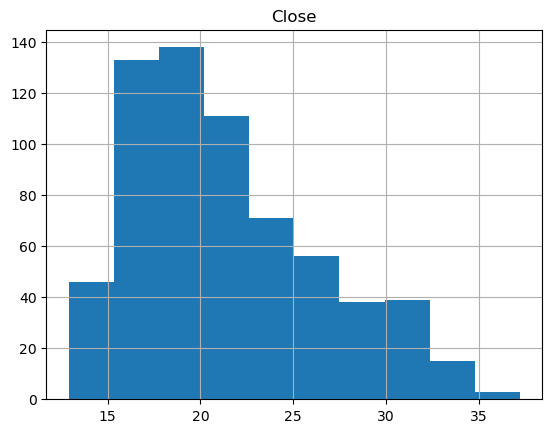

In [21]:
fig = plt.figure(figsize = (10,4))
vix.hist()
#fig.savefig("histograms.png")
plt.show()

In [22]:
import plotly.express as px

#https://plotly.com/python/histograms/

# Create histogram
fig = px.histogram(vix, 
                   nbins=50
)
# Customize the appearance of the bins
fig.update_traces(
    marker=dict(color='blue', opacity=0.5, line=dict(color='black', width=1))
)

# use the update_layout method to adjust the size of the plot
fig.update_layout(
    width=1200,
    height=500
)

# Add a title for the whole figure
fig.update_layout(title={
        'text': "Histogram of VIX Scores",
        'font': {'size': 24},
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()




In [81]:
print("Shape:", vix.shape)

Shape: (650, 2)


## Merge the data

In [82]:
data.head()

Date   Open  Close     Volume
0 2021-01-26 297.13 294.36   69394800
1 2021-01-27 290.12 288.05   82002000
2 2021-01-28 273.33 278.48   79134000
3 2021-01-29 276.67 264.51  104972400
4 2021-02-01 271.43 279.94   76174200

In [83]:
#data.reset_index(inplace = True)
#data.head()

In [85]:
data.columns

Index(['Date', 'Open', 'Close', 'Volume'], dtype='object')

In [27]:
vix.head()

Close
Date             
2021-01-26  23.02
2021-01-27  37.21
2021-01-28  30.21
2021-01-29  33.09
2021-02-01  30.24

In [28]:
vix = pd.DataFrame(vix)
vix.columns

Index(['Close'], dtype='object')

In [29]:
data.shape

(650, 3)

In [30]:
vix.shape

(650, 1)

In [31]:
vix.reset_index(inplace = True)
data.reset_index(inplace = True)

In [32]:
st = pd.merge(data, vix, left_index=True, right_index=True)

              

In [33]:
st.head()

Date_x   Open  Close_x     Volume     Date_y  Close_y
0 2021-01-26 297.13   294.36   69394800 2021-01-26    23.02
1 2021-01-27 290.12   288.05   82002000 2021-01-27    37.21
2 2021-01-28 273.33   278.48   79134000 2021-01-28    30.21
3 2021-01-29 276.67   264.51  104972400 2021-01-29    33.09
4 2021-02-01 271.43   279.94   76174200 2021-02-01    30.24

In [34]:
st = st.drop(['Date_y'], axis =1 )
st.head()

Date_x   Open  Close_x     Volume  Close_y
0 2021-01-26 297.13   294.36   69394800    23.02
1 2021-01-27 290.12   288.05   82002000    37.21
2 2021-01-28 273.33   278.48   79134000    30.21
3 2021-01-29 276.67   264.51  104972400    33.09
4 2021-02-01 271.43   279.94   76174200    30.24

In [35]:
st1 = pd.merge(data, vix,  how = 'inner', on = 'Date')
st1.head()

Date   Open  Close_x     Volume  Close_y
0 2021-01-26 297.13   294.36   69394800    23.02
1 2021-01-27 290.12   288.05   82002000    37.21
2 2021-01-28 273.33   278.48   79134000    30.21
3 2021-01-29 276.67   264.51  104972400    33.09
4 2021-02-01 271.43   279.94   76174200    30.24

In [36]:
st.head()

Date_x   Open  Close_x     Volume  Close_y
0 2021-01-26 297.13   294.36   69394800    23.02
1 2021-01-27 290.12   288.05   82002000    37.21
2 2021-01-28 273.33   278.48   79134000    30.21
3 2021-01-29 276.67   264.51  104972400    33.09
4 2021-02-01 271.43   279.94   76174200    30.24

In [37]:
#vix = st[['Close_y']]
st.columns = ['Date', 'Open', 'Close', 'Volume', 'VIX']
print(st.head())

        Date   Open  Close     Volume   VIX
0 2021-01-26 297.13 294.36   69394800 23.02
1 2021-01-27 290.12 288.05   82002000 37.21
2 2021-01-28 273.33 278.48   79134000 30.21
3 2021-01-29 276.67 264.51  104972400 33.09
4 2021-02-01 271.43 279.94   76174200 30.24


In [38]:
st.set_index("Date", inplace = True)
st.head()

Open  Close     Volume   VIX
Date                                     
2021-01-26 297.13 294.36   69394800 23.02
2021-01-27 290.12 288.05   82002000 37.21
2021-01-28 273.33 278.48   79134000 30.21
2021-01-29 276.67 264.51  104972400 33.09
2021-02-01 271.43 279.94   76174200 30.24

In [39]:
st.index = st.index.strftime('%Y-%m-%d')
st.head()

Open  Close     Volume   VIX
Date                                     
2021-01-26 297.13 294.36   69394800 23.02
2021-01-27 290.12 288.05   82002000 37.21
2021-01-28 273.33 278.48   79134000 30.21
2021-01-29 276.67 264.51  104972400 33.09
2021-02-01 271.43 279.94   76174200 30.24

## Check if there are missing values

In [40]:
st.isna()


Open  Close  Volume    VIX
Date                                   
2021-01-26  False  False   False  False
2021-01-27  False  False   False  False
2021-01-28  False  False   False  False
2021-01-29  False  False   False  False
2021-02-01  False  False   False  False
...           ...    ...     ...    ...
2023-08-18  False  False   False  False
2023-08-21  False  False   False  False
2023-08-22  False  False   False  False
2023-08-23  False  False   False  False
2023-08-24  False  False   False  False

[650 rows x 4 columns]

In [41]:
st.isna().any()

Open      False
Close     False
Volume    False
VIX       False
dtype: bool

In [42]:
st.isna().sum()

Open      0
Close     0
Volume    0
VIX       0
dtype: int64

## No missing Values, Great!

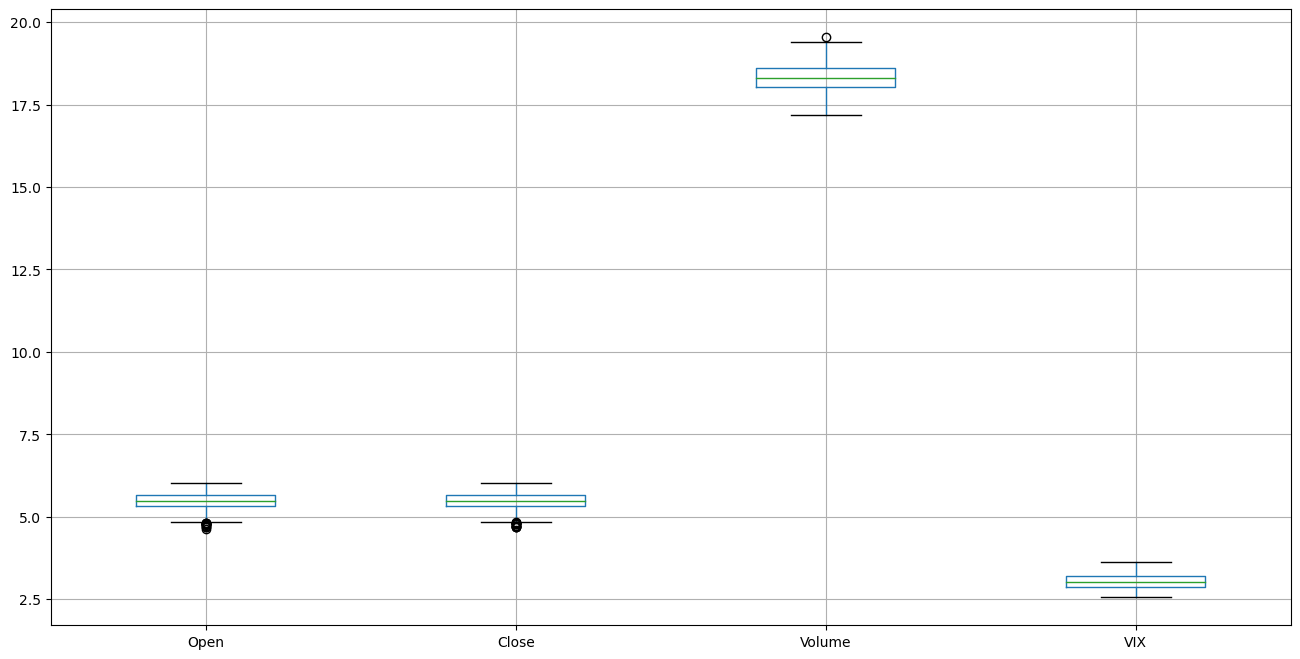

In [43]:
fig = plt.figure(figsize = (16,8))
np.log(st).boxplot()
#fig.savefig("boxpot.png")
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
st_scaled = scaler.fit_transform(st)

In [45]:
type(st_scaled)

numpy.ndarray

In [46]:
st_scaled = pd.DataFrame(st_scaled)
st_scaled.describe()

#with pd.option_context('float_format', '{:.2f}'.format): print(st_scaled.describe()) 

0      1      2      3
count 650.00 650.00 650.00 650.00
mean    0.00  -0.00  -0.00  -0.00
std     1.00   1.00   1.00   1.00
min    -2.42  -2.34  -1.60  -1.68
25%    -0.70  -0.69  -0.73  -0.78
50%    -0.13  -0.13  -0.22  -0.19
75%     0.64   0.66   0.48   0.61
max     2.76   2.76   4.75   3.13

In [47]:
st_scaled.head()

0    1     2    3
0 0.84 0.80 -0.68 0.32
1 0.72 0.70 -0.40 3.13
2 0.44 0.53 -0.46 1.75
3 0.50 0.30  0.13 2.32
4 0.41 0.56 -0.53 1.75

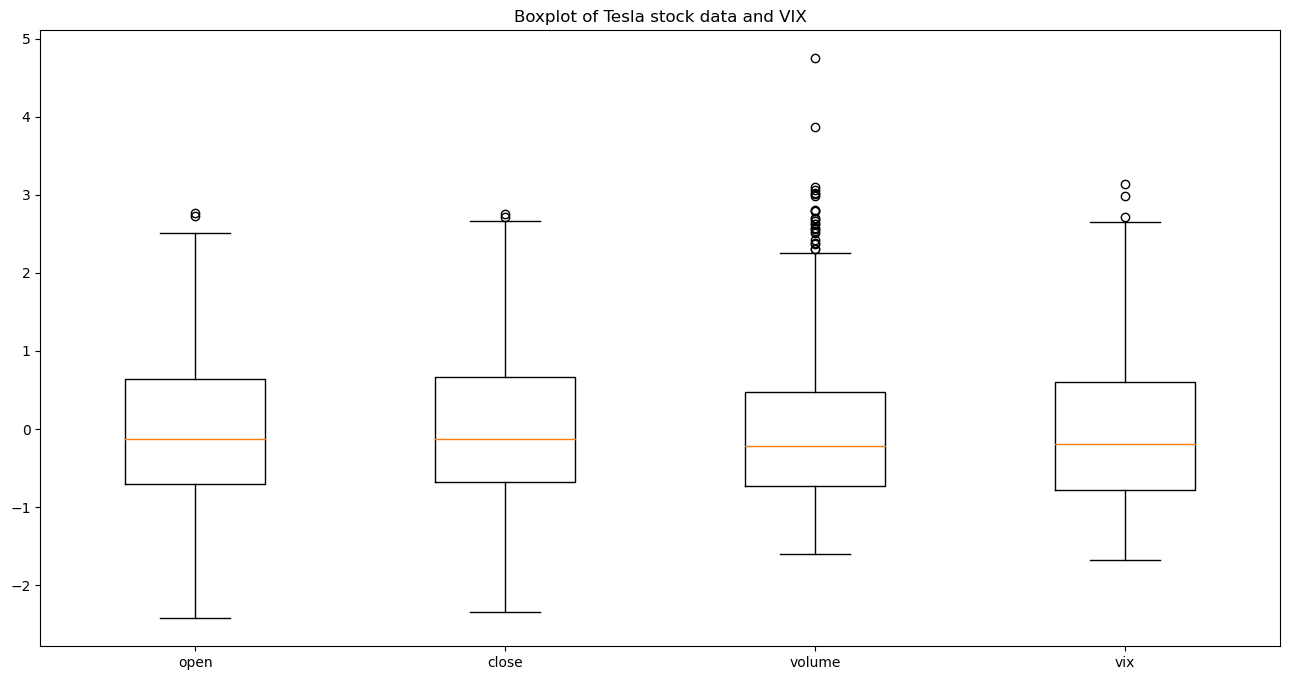

In [48]:
fig = plt.figure(figsize = (16,8))
bxplt = plt.subplot()
bxplt.set_title('Boxplot of Tesla stock data and VIX')
bxplt.boxplot(st_scaled)
plt.xticks([1,2,3,4], ['open', 'close', 'volume', 'vix'])
#plt.xlabel('Category')
#plt.ylabel('Price')
#fig.savefig("boxpot.png")
plt.show()

## Plot the Correlation Heatmap

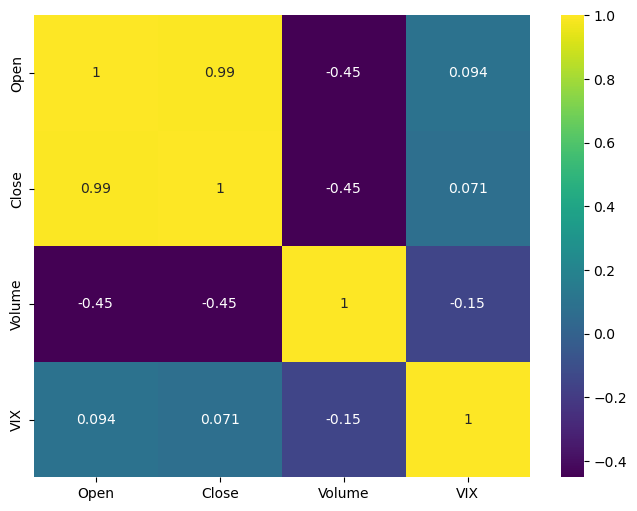

In [49]:
fig = plt.figure(figsize= (8,6))
sns.heatmap(st.corr(), cmap="viridis", annot=True)
#fig.savefig('correlation_heatmap.png')
plt.show()

## Plot the time series 

<Figure size 1600x1600 with 0 Axes>

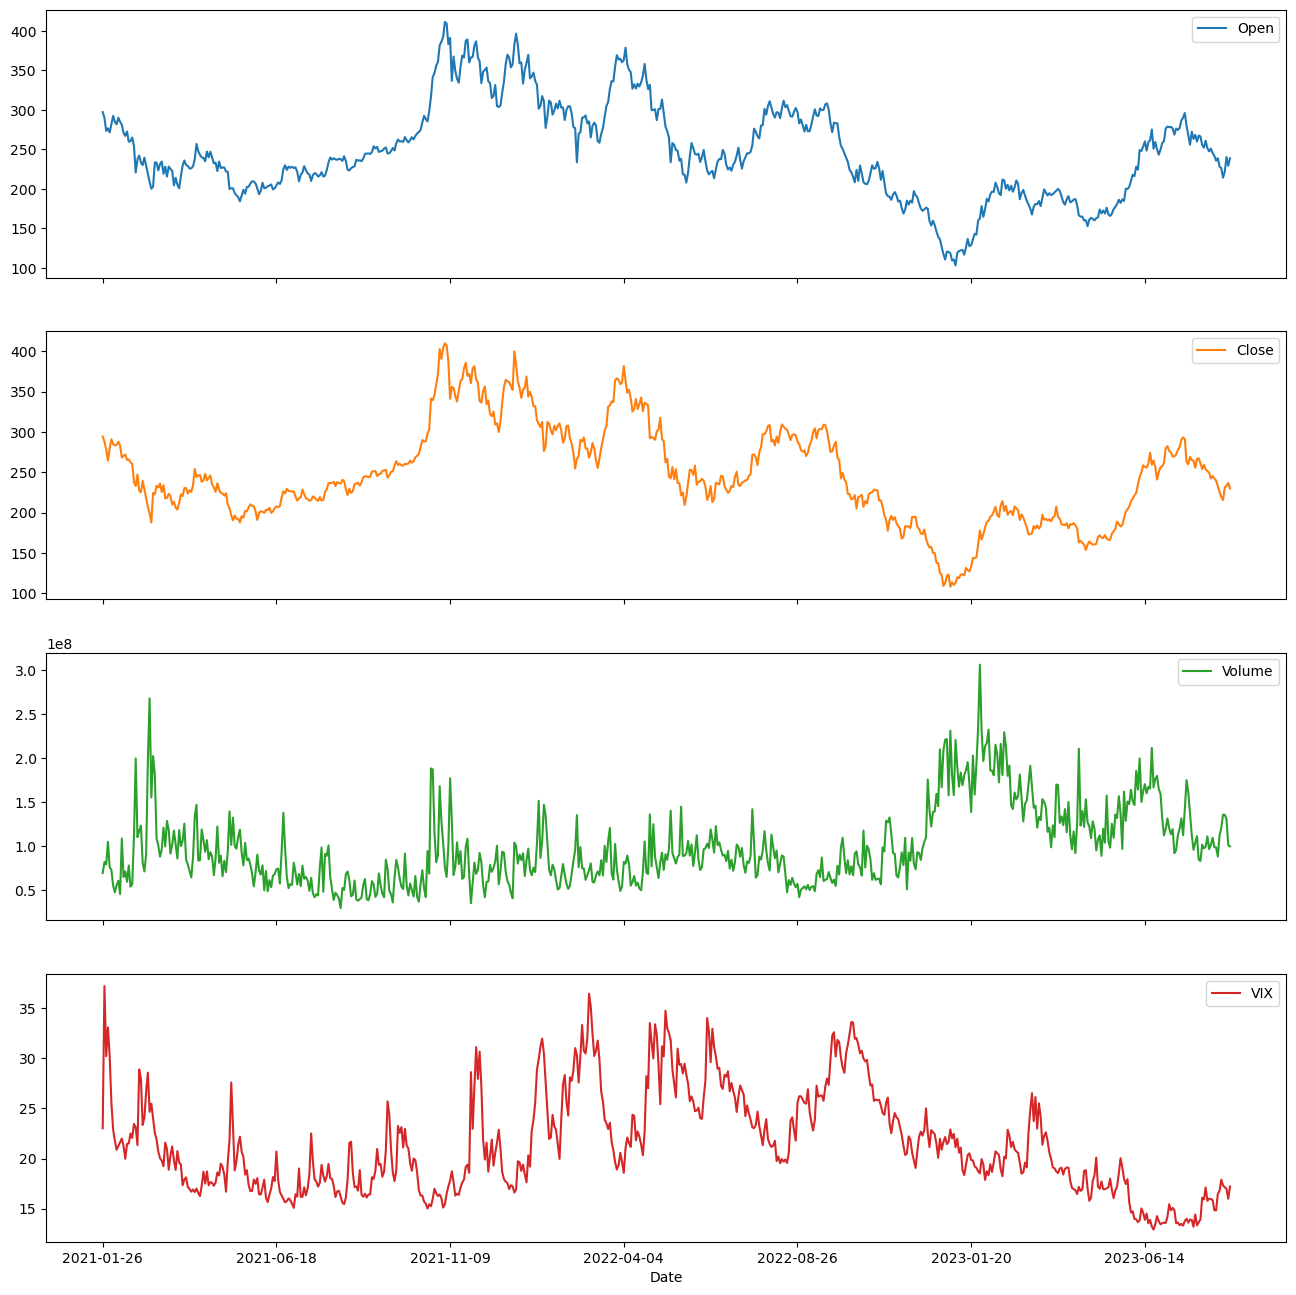

In [50]:
fig = plt.figure(figsize = (16, 16))
st.plot(subplots = True, figsize = (16,16))
#fig.savefig('timeseries.png')
plt.show()

## Plot moving averages

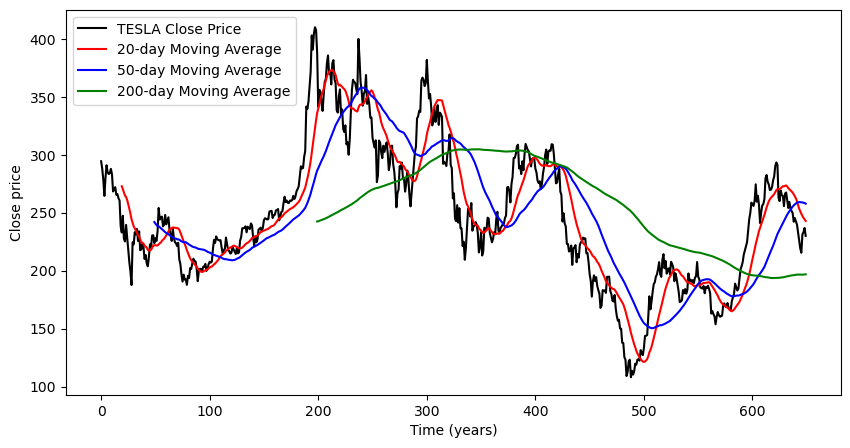

In [51]:
df = data.copy() # data was the stock price of TESLA
df['MA_20'] = df['Close'].rolling(20).mean()
df['MA_50'] = df['Close'].rolling(50).mean()
df['MA_200'] = df['Close'].rolling(200).mean()

fig = plt.figure(figsize=(10,5))
fig.set(facecolor = "white")
plt.plot(df['Close'], 'k',label=['TESLA Close Price'])
plt.plot(df['MA_20'],'r', label=['20-day MA'])
plt.plot(df['MA_50'],'b', label=['50-day MA'])
plt.plot(df['MA_200'],'g', label=['200-day MA'])
plt.legend(['TESLA Close Price', '20-day Moving Average','50-day Moving Average', '200-day Moving Average'], loc='upper left')
plt.title('')
plt.xlabel('Time (years)')
plt.ylabel('Close price')
#sns.set_style("whitegrid")
#fig.savefig('original_data_plus_moving_averages.png',dpi=600)
plt.show()

## Machine failure data

In [52]:
mf= "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"
df_mf = pd.read_csv(mf, header = 0)
#df_mf.to_csv('df_mf.csv', header=True, index=None)


In [53]:
df_mf.info() #indicates the column name, number of filled values, and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [54]:
df_mf.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M               298.10                   308.60   
1    2     L47181    L               298.20                   308.70   
2    3     L47182    L               298.10                   308.50   
3    4     L47183    L               298.20                   308.60   
4    5     L47184    L               298.20                   308.70   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551        42.80                0                0    0   
1                    1408        46.30                3                0    0   
2                    1498        49.40                5                0    0   
3                    1433        39.50                7                0    0   
4                    1408        40.00                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [55]:
df_mf.describe()
#with pd.option_context('float_format', '{:.2f}'.format): print(df_mf.describe())

UDI  Air temperature [K]  Process temperature [K]  \
count 10,000.00            10,000.00                10,000.00   
mean   5,000.50               300.00                   310.01   
std    2,886.90                 2.00                     1.48   
min        1.00               295.30                   305.70   
25%    2,500.75               298.30                   308.80   
50%    5,000.50               300.10                   310.10   
75%    7,500.25               301.50                   311.10   
max   10,000.00               304.50                   313.80   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
count               10,000.00    10,000.00        10,000.00        10,000.00   
mean                 1,538.78        39.99           107.95             0.03   
std                    179.28         9.97            63.65             0.18   
min                  1,168.00         3.80             0.00             0.00   
25%                  1,423.00        33.20            53.00             0.00   
50%                  1,503.00        40.10           108.00             0.00   
75%                  1,612.00        46.80           162.00             0.00   
max                  2,886.00        76.60           253.00             1.00   

            TWF       HDF       PWF       OSF       RNF  
count 10,000.00 10,000.00 10,000.00 10,000.00 10,000.00  
mean       0.00      0.01      0.01      0.01      0.00  
std        0.07      0.11      0.10      0.10      0.04  
min        0.00      0.00      0.00      0.00      0.00  
25%        0.00      0.00      0.00      0.00      0.00  
50%        0.00      0.00      0.00      0.00      0.00  
75%        0.00      0.00      0.00      0.00      0.00  
max        1.00      1.00      1.00      1.00      1.00

<Axes: >

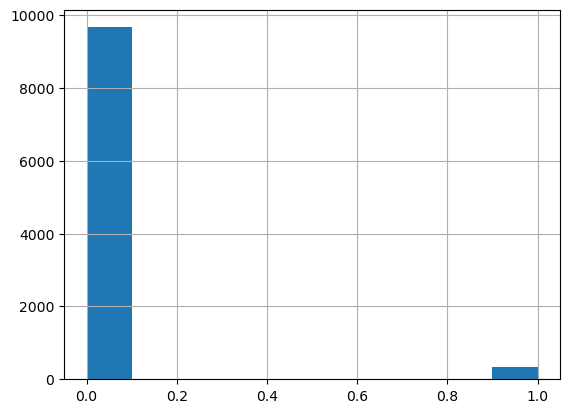

In [56]:
df_mf['Machine failure'].hist()

In [57]:
df_mf[df_mf['Machine failure']==1].count()

UDI                        339
Product ID                 339
Type                       339
Air temperature [K]        339
Process temperature [K]    339
Rotational speed [rpm]     339
Torque [Nm]                339
Tool wear [min]            339
Machine failure            339
TWF                        339
HDF                        339
PWF                        339
OSF                        339
RNF                        339
dtype: int64

In [58]:
df_mf[df_mf['Machine failure']==0].count()

UDI                        9661
Product ID                 9661
Type                       9661
Air temperature [K]        9661
Process temperature [K]    9661
Rotational speed [rpm]     9661
Torque [Nm]                9661
Tool wear [min]            9661
Machine failure            9661
TWF                        9661
HDF                        9661
PWF                        9661
OSF                        9661
RNF                        9661
dtype: int64

In [59]:
# #import LabelEncoder library 
# from sklearn.preprocessing import LabelEncoder

# # Assigning numerical values and storing in another column
# df_mf = df_mf.apply(LabelEncoder().fit_transform)
# df_mf.head()


#Use this if you like to create dummies instead

#We can use drop_first = True to create k-1 dummies for k categories or manually drop one set later
dummies = pd.get_dummies(df_mf['Type']) 
dummies.head()

H      L      M
0  False  False   True
1  False   True  False
2  False   True  False
3  False   True  False
4  False   True  False

In [60]:
df_mf = pd.concat([df_mf, dummies], axis = 1)

In [61]:
df_mf.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M               298.10                   308.60   
1    2     L47181    L               298.20                   308.70   
2    3     L47182    L               298.10                   308.50   
3    4     L47183    L               298.20                   308.60   
4    5     L47184    L               298.20                   308.70   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551        42.80                0                0    0   
1                    1408        46.30                3                0    0   
2                    1498        49.40                5                0    0   
3                    1433        39.50                7                0    0   
4                    1408        40.00                9                0    0   

   HDF  PWF  OSF  RNF      H      L      M  
0    0    0    0    0  False  False   True  
1    0    0    0    0  False   True  False  
2    0    0    0    0  False   True  False  
3    0    0    0    0  False   True  False  
4    0    0    0    0  False   True  False

In [62]:
#using columns locations
#df_mf = df_mf.drop(df_mf.iloc[:,[0,1,2,]], axis =1)

#using column names
df_mf = df_mf.drop(['UDI','Product ID', 'Type',], axis = 1) 
df_mf.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0               298.10                   308.60                    1551   
1               298.20                   308.70                    1408   
2               298.10                   308.50                    1498   
3               298.20                   308.60                    1433   
4               298.20                   308.70                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  \
0        42.80                0                0    0    0    0    0    0   
1        46.30                3                0    0    0    0    0    0   
2        49.40                5                0    0    0    0    0    0   
3        39.50                7                0    0    0    0    0    0   
4        40.00                9                0    0    0    0    0    0   

       H      L      M  
0  False  False   True  
1  False   True  False  
2  False   True  False  
3  False   True  False  
4  False   True  False

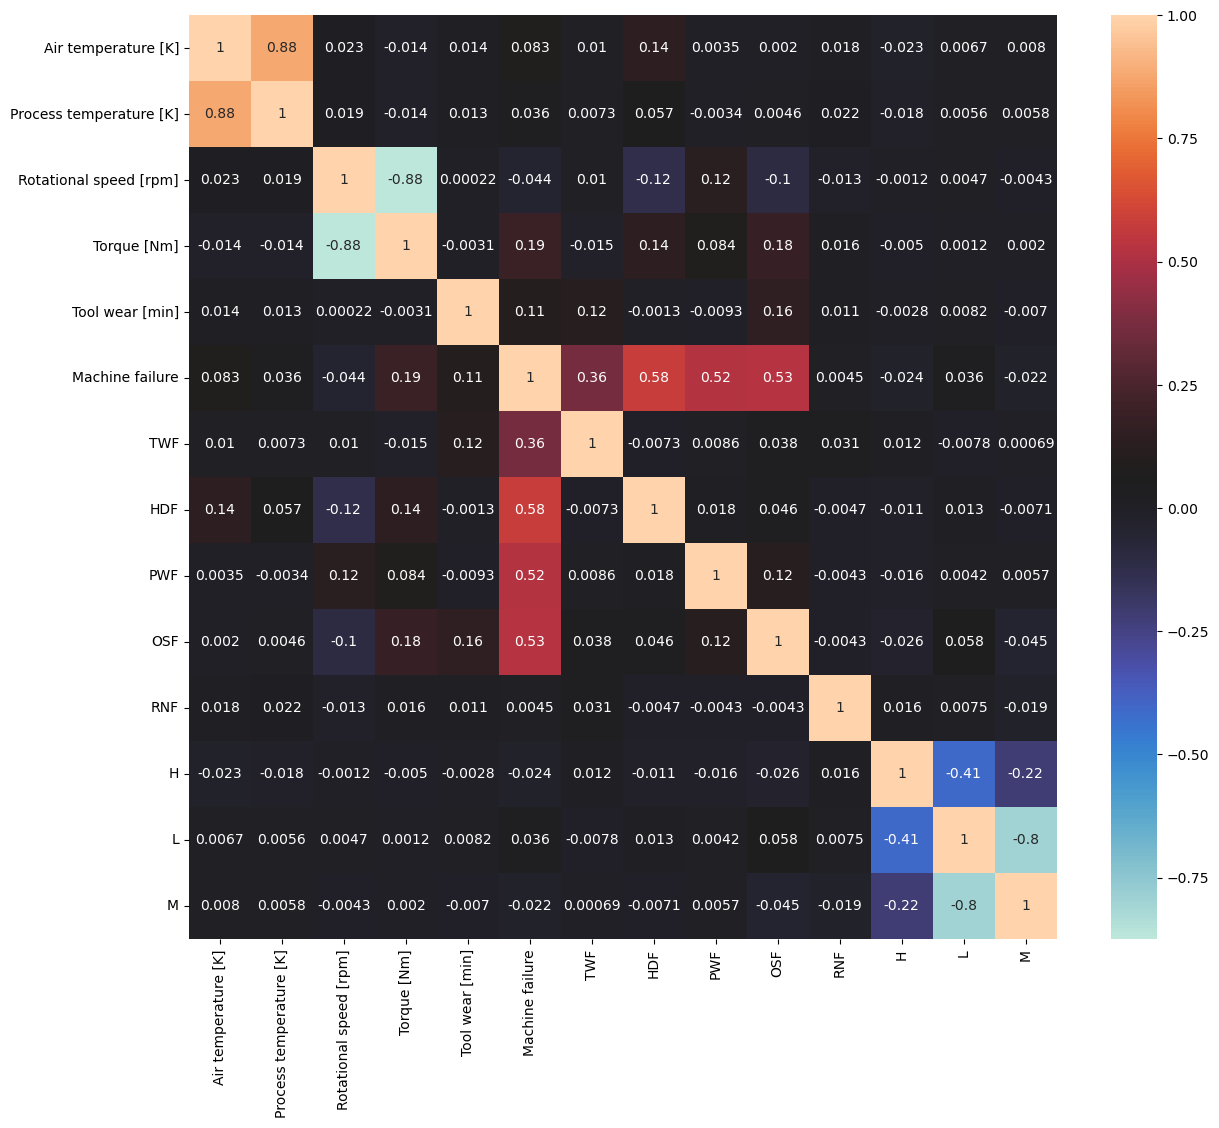

In [63]:
fig = plt.figure(figsize= (14,12))
sns.heatmap(df_mf.corr(),cmap="icefire", annot=True)
plt.show() ## to save figure use fig.savefig('mf_correlation_heatmap.png')

## Bad Dog Data (obtained from Dr. Apigian)

#To read the data
https://pandas.pydata.org/pandas-docs/stable/api.html#flat-file

In [64]:
bd = pd.read_csv('Data_Sets/BadDogContinuing.csv', index_col = 0, header=0) 
#index_col = 0 sets the first column to the index
# header=0 sets the top row as the header

### 1) For the  initial exploration of  Data
- head( )
- tail( )
- sample( )
- info( )
- describe( )

In [65]:
bd.head()

Email Address  Website  Newsletter  Tasting  Call  \
Member ID                                                                
201500660    wpet15@googlemail.com     0.00       79.26   257.91  0.00   
201602818      brooksb@charter.net     0.00        0.00   173.68  0.00   
201602130            smarsh@me.com     0.00        0.00   201.12  0.00   
201600192  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00   
201500143       elsv34@comcast.net     0.00        0.00    62.37  0.00   

           Visits Customer_Segment Wealth Range Estimate      Status  \
Member ID                                                              
201500660    4.00   Casual Visitor             $400-800k  Continuing   
201602818    1.00   Casual Visitor           Below $100k  Continuing   
201602130    1.00   Casual Visitor             $100-200k  Continuing   
201600192    0.00    Luxury Estate            $800-1200k  Continuing   
201500143    2.00   Casual Visitor             $200-400k  Continuing   

                  Date  
Member ID               
201500660  1/1/20 1:12  
201602818  1/1/20 3:20  
201602130  1/1/20 4:35  
201600192  1/1/20 7:11  
201500143  1/1/20 7:12

In [66]:
bd.sample(10) #A random sample of 10 rows

Email Address  Website  Newsletter  Tasting   Call  \
Member ID                                                                
201600134  m.farmer@sbcglobal.net     0.00      263.28     0.00   0.00   
201600401          jmey22@msn.com     0.00       33.40   284.53   0.00   
201604053          twil13@aol.com     0.00        0.00   361.53   0.00   
201601291     williams5@yahoo.com     0.00        0.00   107.88   0.00   
201502058    lesm91@bellsouth.net     0.00        0.00   260.02   0.00   
201601277     reid3@bellsouth.net     0.00        0.00     0.00 646.52   
201400216          dono59@cox.net     0.00        0.00   217.49   0.00   
201502564         lik@comcast.net   106.02       42.94   616.94   0.00   
201400547      jwhi99@comcast.net     0.00        0.00   124.59   0.00   
201501465         brandtj@gmx.com     0.00        0.00   160.33   0.00   

           Visits Customer_Segment Wealth Range Estimate      Status  \
Member ID                                                              
201600134    0.00    Luxury Estate            $800-1200k  Continuing   
201600401    3.00   Casual Visitor             $200-400k  Continuing   
201604053    2.00   Casual Visitor             $200-400k  Continuing   
201601291    3.00   Casual Visitor             $200-400k  Continuing   
201502058    2.00   Casual Visitor             $200-400k  Continuing   
201601277    0.00      High Roller             $400-800k  Continuing   
201400216    2.00   Casual Visitor             $100-200k  Continuing   
201502564    4.00   Casual Visitor             $400-800k  Continuing   
201400547    1.00   Casual Visitor           Below $100k  Continuing   
201501465    1.00   Casual Visitor             $100-200k  Continuing   

                    Date  
Member ID                 
201600134   1/30/20 5:37  
201600401  6/20/20 18:25  
201604053  9/11/20 11:33  
201601291   3/20/20 3:55  
201502058   3/20/20 2:06  
201601277  3/30/20 14:46  
201400216    1/3/20 1:56  
201502564   7/8/20 13:41  
201400547  3/28/20 14:10  
201501465   6/7/20 17:23

In [67]:
bd.tail(8) #shows last 8 rows

Email Address  Website  Newsletter  Tasting  Call  Visits  \
Member ID                                                                     
201501491    syla57@charter.net     0.00        0.00   260.94  0.00    1.00   
201600186    jcantrell2@gmx.com     0.00        0.00   436.65  0.00    3.00   
201500550  d.heath@facebook.com     0.00        0.00    80.80  0.00    3.00   
201500067         jwal2@msn.com     0.00        0.00   629.53  0.00    4.00   
201500301       crivera@mac.com     0.00      685.38     0.00  0.00    0.00   
201603872      emiller6@att.net     0.00        0.00   120.28  0.00    3.00   
201400272      hmolina3@gmx.com    71.17        0.00    66.96  0.00    1.00   
201400019     garcia9@gmail.com     0.00        0.00   247.84  0.00    2.00   

          Customer_Segment Wealth Range Estimate      Status            Date  
Member ID                                                                     
201501491  Wine Enthusiast             $100-200k  Continuing  10/11/20 18:06  
201600186   Casual Visitor             $200-400k  Continuing  10/11/20 18:49  
201500550   Casual Visitor             $200-400k  Continuing  10/11/20 19:17  
201500067   Casual Visitor             $200-400k  Continuing  10/11/20 19:30  
201500301    Luxury Estate            $800-1200k  Continuing  10/11/20 23:13  
201603872   Casual Visitor             $200-400k  Continuing  10/11/20 23:15  
201400272  Wine Enthusiast             $200-400k         NaN   4/19/20 15:18  
201400019   Casual Visitor             $200-400k         NaN   7/12/20 12:47

In [68]:
bd.info() #indicates the column name, number of filled values, and data type

<class 'pandas.core.frame.DataFrame'>
Index: 5500 entries, 201500660 to 201400019
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email Address          5500 non-null   object 
 1   Website                5499 non-null   float64
 2   Newsletter             5499 non-null   float64
 3   Tasting                5499 non-null   float64
 4   Call                   5499 non-null   float64
 5   Visits                 5499 non-null   float64
 6   Customer_Segment       5498 non-null   object 
 7   Wealth Range Estimate  5500 non-null   object 
 8   Status                 5498 non-null   object 
 9   Date                   5500 non-null   object 
dtypes: float64(5), object(5)
memory usage: 472.7+ KB


### 2) Slice and Filter Data

In [69]:
bd[['Website']].head()
#bd['Website'].head()

Website
Member ID         
201500660     0.00
201602818     0.00
201602130     0.00
201600192     0.00
201500143     0.00

In [70]:
bd.iloc[:, [1]].head()

Website
Member ID         
201500660     0.00
201602818     0.00
201602130     0.00
201600192     0.00
201500143     0.00

In [71]:
bd.iloc[:, [1, 2, 4]].head()

Website  Newsletter  Call
Member ID                           
201500660     0.00       79.26  0.00
201602818     0.00        0.00  0.00
201602130     0.00        0.00  0.00
201600192     0.00      383.51  0.00
201500143     0.00        0.00  0.00

In [72]:
bd_cus = bd.iloc[:, [0, 1, 2, 3, 4]]
bd_cus.head()

Email Address  Website  Newsletter  Tasting  Call
Member ID                                                             
201500660    wpet15@googlemail.com     0.00       79.26   257.91  0.00
201602818      brooksb@charter.net     0.00        0.00   173.68  0.00
201602130            smarsh@me.com     0.00        0.00   201.12  0.00
201600192  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00
201500143       elsv34@comcast.net     0.00        0.00    62.37  0.00

In [73]:
 bd.iloc[0:5, [0, 1, 2, 3, 4 ]]#select first five rows of columns0, 1, 2, 3, 4 of bd data

Email Address  Website  Newsletter  Tasting  Call
Member ID                                                             
201500660    wpet15@googlemail.com     0.00       79.26   257.91  0.00
201602818      brooksb@charter.net     0.00        0.00   173.68  0.00
201602130            smarsh@me.com     0.00        0.00   201.12  0.00
201600192  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00
201500143       elsv34@comcast.net     0.00        0.00    62.37  0.00

## XXXXXXXXXXXXXXXXXXX XXXXXXXXXXXXXXXXXXXX
### 3) Explore the data

- Describe
- Groupby
- plot with MatPlotLib
- plot with Seaborn

In [74]:
bd.describe()

Website  Newsletter  Tasting     Call   Visits
count 5,499.00    5,499.00 5,499.00 5,499.00 5,499.00
mean     36.21       59.22   211.51    24.04     1.87
std     162.29      152.48   384.92   106.22     1.48
min       0.00        0.00     0.00     0.00     0.00
25%       0.00        0.00    38.26     0.00     1.00
50%       0.00        0.00   147.91     0.00     2.00
75%       0.00       37.34   290.35     0.00     3.00
max   2,924.43    1,512.44 6,964.53 1,258.64    10.00

In [75]:
bd.groupby('Customer_Segment').count()

Email Address  Website  Newsletter  Tasting  Call  Visits  \
Customer_Segment                                                              
Casual Visitor             3917     3917        3917     3917  3917    3917   
High Roller                 275      275         275      275   275     275   
Luxury Estate               853      853         853      853   853     853   
Wine Enthusiast             453      453         453      453   453     453   

                  Wealth Range Estimate  Status  Date  
Customer_Segment                                       
Casual Visitor                     3917    3916  3917  
High Roller                         275     275   275  
Luxury Estate                       853     853   853  
Wine Enthusiast                     453     452   453

In [76]:
bd.groupby('Wealth Range Estimate').mean()

TypeError: Could not convert smarsh@me.comjjohnson6@charter.netronr43@sbcglobal.netj.ortega@earthlink.netking3@mail.combgra16@charter.netgallison@verizon.netbmitchell7@aol.comhalel@google.comdono59@cox.nete.griffin@gmail.combpalmer7@aol.comm.bishop@hotmail.comsnyder2@bellsouth.netgcom16@comcast.netthomasm@googlemail.comjmccullough5@att.netrodriguez4@google.comb.hall@yahoo.comtthompson2@juno.comcjoh97@googlemail.comapeters3@charter.nethubbard1@hotmail.comlwalters7@mail.commjon98@yahoo.comepen80@att.netnhen82@bellsouth.netgeop48@sbcglobal.netfayc43@cox.netrpeck9@cox.neteshah@juno.comjwilliams5@facebook.comrbar70@googlemail.comcmatthews6@verizon.netclarke1@me.comjcastillo8@mail.coms.johnson@bellsouth.netj.flowers@hotmail.commatm53@juno.comc.joyce@msn.complop40@att.netkhubbard6@mail.compamm93@gmx.comstonee@mail.comd.turner@verizon.netprivera@googlemail.comwwashington@googlemail.combsimpson@aol.comhiggins3@sbcglobal.netlbar64@att.netdsmi66@google.comjgal73@msn.comeconley@gmail.comsusi30@juno.comslewis@mail.comlesg82@gmail.comcarg8@charter.netg.cortez@earthlink.netsalasc@googlemail.comh.brown@live.comcarr26@verizon.netyork7@google.comjben36@aol.combwil32@earthlink.netshafferb@googlemail.comt.jones@gmx.comi.wong@googlemail.comaustin5@verizon.netklucas@cox.netreed1@hotmail.comy.roberts@gmail.commsimon3@live.comchapman9@live.comj.strickland@bellsouth.nethmad65@bellsouth.nete.cole@google.comrsmith6@yahoo.comharrisonm@msn.compharrison6@aol.combkaufman@att.netjknox@juno.comli9@verizon.netb.andrade@yahoo.comwhutchinson@sbcglobal.nettfox36@earthlink.netgay2@juno.comlandryr@comcast.netmtuc9@juno.comrusg95@gmx.comtimc4@earthlink.netjwil52@juno.comsullivan6@facebook.comjtho26@mac.comdanielsm@aol.combmiller@mac.combars49@charter.netevans7@live.comphamw@gmx.comb.mcdonald@me.comortize@me.comgilesm@mail.comdavis1@comcast.netpramirez4@hotmail.comaara46@gmail.comdouc31@yahoo.comdmurphy6@google.comdzamora@charter.netgonzalezj@charter.nettshelton8@gmail.commdav58@juno.coml.carey@facebook.comhsanders5@mac.comt.harper@yahoo.comdbow33@msn.comfowlere@hotmail.comtric86@cox.netmwatkins1@comcast.netd.owens@google.commils95@charter.netclark4@juno.comt.wilson@facebook.comkmcgrath@att.netnvan38@hotmail.comfjohnson@juno.comdsmi44@mac.combanks5@gmail.coml.boyle@mac.combmiller3@bellsouth.netsmckinney1@comcast.netburnsl@facebook.comjshe6@charter.netgraham4@sbcglobal.netbnie4@mail.comhodges1@facebook.comdonm52@earthlink.netortiza@sbcglobal.netswilliamson@yahoo.comwesh48@juno.comwilliamse@charter.netlesd30@sbcglobal.netsheppard1@aol.comandj15@verizon.netdorm56@me.comdscott5@juno.comwardc@comcast.netecastaneda@live.comj.collier@gmx.combrown3@me.comarey41@googlemail.composborne@yahoo.comcdunn@googlemail.comrorr89@aol.comlstone7@comcast.netbbradshaw@cox.netk.taylor@gmail.comwilliamsl@gmx.comchrn2@facebook.comrhernandez8@facebook.comj.davies@cox.netsblair8@google.comspencerb@att.netjwallace@mail.comcbus82@gmx.comlhodge@mac.comjferguson4@gmail.comrlyn5@mac.comdean7@facebook.comrice3@mac.comdcole6@me.commlea87@me.comp.weber@gmail.comarte93@facebook.comclarkt@yahoo.combobg69@verizon.netbrowng@hotmail.comdord94@mail.comcatj70@comcast.netwilliamsa@googlemail.comshannonk@googlemail.comsjoh50@yahoo.comdrake1@gmail.commkent2@charter.netlopezr@earthlink.netreed3@cox.nethuffman1@juno.command85@bellsouth.netlngu36@googlemail.comharc36@verizon.netmccormickg@bellsouth.netkjohnson5@gmail.comjspencer6@yahoo.comtkelley1@mac.comemurphy6@verizon.netfrav20@bellsouth.netehunt@mail.comdavis1@live.commcgee1@yahoo.comperry3@gmail.comtrob84@att.netwoods8@gmx.commarp11@cox.netjohnsonw@charter.nett.hebert@aol.comrichards9@googlemail.communoz1@google.comjohnsona@earthlink.netbrown4@live.comwrowland@me.combball@hotmail.comcmcguire5@aol.comlarson8@att.netdonm13@yahoo.comgking1@charter.nethornj@mail.comhallk@charter.netgonzalesg@cox.netmhun79@mac.comlong7@earthlink.netlrey24@juno.comgillespied@gmail.comnstevenson5@sbcglobal.netsbel89@google.comlhughes@gmail.comjones6@aol.comljon12@charter.netpricea@googlemail.comrobinsonj@google.comj.burton@charter.netb.kaiser@mail.combooker8@google.comrphelps@bellsouth.netbholland9@juno.comkjohnson8@comcast.netmorganm@earthlink.netcsherman6@juno.comparkerm@att.netthomass@cox.netbrooks4@charter.nettsan31@facebook.comrbond@yahoo.comstur75@yahoo.comholmes6@yahoo.comhmoo19@gmail.comingram4@gmail.comw.gomez@earthlink.netjpratt5@bellsouth.nete.jackson@facebook.comwilw77@gmx.comjyang6@charter.netc.tucker@mail.commallen@att.netjdav89@googlemail.comyreynolds9@verizon.netjmadden8@sbcglobal.nethelg1@comcast.netrdickson@verizon.netbradford2@hotmail.comwobr49@facebook.comsmithj@yahoo.coms.mcdaniel@google.comandh12@mail.comcjohnston1@hotmail.comt.wood@hotmail.commavi36@comcast.netschmidtd@live.comwalg72@verizon.netjpatterson9@msn.comkwagner@charter.nett.smith@facebook.comgonzales1@gmail.comjhen67@sbcglobal.netssteele7@juno.comannc12@sbcglobal.netrodriguezc@cox.netgcoo35@juno.comj.miles@juno.comjpatel9@gmx.comkelly1@aol.comg.campbell@cox.netrfar35@sbcglobal.netdvaldez@juno.comjfernandez@yahoo.comkperez@bellsouth.netrobf8@comcast.netdreese8@gmx.compinedat@sbcglobal.neta.mitchell@msn.comkgardner2@mail.comjgra30@juno.comrios9@yahoo.comjhen19@msn.comriosj@live.comalew53@verizon.netsellison@juno.comclay1@aol.comashley5@facebook.comgarza7@mac.combilm82@gmail.comr.johnson@live.comholmes9@gmail.comdonh86@googlemail.comgomezj@google.comj.ayala@me.coml.dalton@bellsouth.netsharp2@sbcglobal.netoneal9@mail.comdeckerm@googlemail.commillerf@me.comjguerra@google.comsturner3@bellsouth.netbaileys@sbcglobal.netjenkinss@msn.comkayh12@charter.netj.parrish@live.comjevans4@googlemail.commics50@google.comc.martinez@me.comsmith7@gmail.comtrei44@hotmail.comaduncan@gmx.commree81@msn.comafoster3@google.comronw13@comcast.netdmartinez6@cox.netrsol49@att.netwhite4@att.netl.pittman@gmx.comjosephd@earthlink.netebarnes@cox.netcastanedaj@gmx.comssco39@sbcglobal.netrarnold@att.netjlawrence1@sbcglobal.nethullj@verizon.netmjones7@me.comp.davies@juno.comryaj12@yahoo.commontes9@me.comkgriffith@bellsouth.netjleblanc1@cox.netkramer6@gmail.comguerrad@att.netabailey@earthlink.netwilb59@comcast.netjeam8@mac.comdrosario9@mail.comm.cox@msn.comwilh53@mac.comchapman8@aol.comtannerl@earthlink.netd.garcia@earthlink.netdkrueger7@earthlink.netmelb52@bellsouth.neta.salazar@google.comallen2@mac.commram2@cox.netrmiller4@gmx.comrho1@earthlink.netj.terry@hotmail.comkgor93@mail.comlhunt@sbcglobal.nett.wiggins@msn.comnelson2@mac.comabishop4@google.combaileym@live.comnanr97@google.comflee1@hotmail.combryant3@bellsouth.netmalvarez8@charter.netrfranco8@att.nets.sheppard@google.comrboyd3@att.netjhenderson8@earthlink.netkmorgan@att.netjackson6@bellsouth.netdennis4@earthlink.nettjensen1@juno.comcollinsm@charter.netbrobinson@msn.commirb94@gmail.comcampbell8@earthlink.netchristian3@msn.comcjuarez@verizon.netjyan11@juno.comdkramer@earthlink.netb.erickson@msn.comlatg81@google.comr.davenport@verizon.netgilbertr@sbcglobal.netjennings4@sbcglobal.netburke9@mac.comj.taylor@msn.comjgonzalez@me.comgilc2@googlemail.comkfoster1@facebook.comdavisn@hotmail.comacox@charter.netgallen1@gmail.comladj39@att.netsmat11@googlemail.comdjackson7@juno.comrsampson@live.comclementsj@mac.comr.le@gmail.comc.gonzalez@gmx.comr.daugherty@google.comn.james@google.comcollins8@bellsouth.nethalle@gmail.comgjohns6@gmx.comcjenkins@juno.commoore8@hotmail.commgray9@comcast.netwbrown9@me.commorris8@comcast.netcmartinez@googlemail.comjackson6@aol.comjuaw49@googlemail.comganderson8@mail.comcynb30@juno.comjudh91@juno.come.king@aol.comabaxter9@me.comcwood7@gmail.comparker3@att.netkerr2@facebook.comltaylor@msn.comwhiteo@live.comtgriffin@bellsouth.netfarmerm@juno.compdavis@juno.comhughesa@aol.commbooth3@cox.netcsmith@bellsouth.netelsc97@juno.comkeithg@aol.comkpearson5@mac.comebrooks@verizon.netjrice2@earthlink.netkrih48@gmail.commzimmerman1@cox.netpenningtonj@juno.comsummersm@charter.netgweb40@sbcglobal.netdliv63@comcast.netsdiaz@juno.comvelazquez7@yahoo.comwood7@juno.comfrar23@yahoo.comkcraig5@mail.comjoso90@live.come.chang@mail.comr.jordan@gmail.comaatkinson7@earthlink.netmbrewer8@juno.comdiar76@comcast.netfinley7@bellsouth.netmhof78@sbcglobal.netm.young@juno.commagh74@me.coms.jackson@cox.netcking1@comcast.netmngu32@msn.comhobbs5@hotmail.comcalderonn@earthlink.netmphillips@mail.combwalker7@msn.comj.lee@gmx.comfloresf@comcast.netr.sheppard@aol.comfletcherj@att.netsimpsonc@att.nete.peterson@sbcglobal.nettorres5@mac.comrowe1@verizon.netrwil65@aol.comdand70@verizon.netfuentes5@att.netbarnesk@live.comk.nguyen@att.netwilj14@mac.comarobertson5@google.comdnelson@gmail.comcoleman9@me.comfrancis1@hotmail.comtheh22@comcast.netpatterson5@mail.comsutton2@facebook.comtima36@earthlink.netlewis7@verizon.netbperry6@gmx.comfrancis4@hotmail.comcwat74@gmail.comtjoh81@live.comkarh45@charter.neta.santos@yahoo.comjbentley@gmail.comrsha93@live.comjgon81@msn.comvalenzuelar@googlemail.comsfra44@att.nettrad53@mac.comiche39@google.comdrussell8@mail.comd.hebert@msn.comojoh59@juno.comewhe37@gmail.commcgeel@earthlink.netl.brown@att.netcross@facebook.comagood@facebook.comr.knight@yahoo.comkwilliams@sbcglobal.netpvaldez7@yahoo.comghernandez@gmx.comgenp36@gmx.comsimmons7@gmx.comf.kaiser@juno.comlnixon5@mail.comdelg86@gmail.comellisons@sbcglobal.netf.stewart@comcast.netsmeyer@comcast.netr.thomas@juno.comgordonc@charter.netjjohnson9@sbcglobal.netl.ferrell@gmx.comwang9@mail.comdjon78@yahoo.comrolw29@gmx.comsmcbride4@live.comsgomez@google.comd.reese@bellsouth.netvelezp@yahoo.comkrim61@hotmail.comwgriffin@hotmail.comtaylor9@mac.comjree93@gmail.comthomas9@cox.netfban32@sbcglobal.netjschwartz@gmx.comjefferson5@sbcglobal.netbelll@facebook.commagu16@yahoo.combsmith6@charter.netekoch7@comcast.netcrane9@msn.comscott6@facebook.comj.phillips@cox.netbell6@me.comharveyw@yahoo.comlewis5@msn.comtorres1@comcast.netjvillanueva6@gmail.comrmcc35@att.netcwilliams@msn.comfullerj@yahoo.comowens8@comcast.netgpope@comcast.netdbro53@cox.netahudson7@google.comwillisw@msn.comcmathis2@hotmail.comj.williams@msn.comwesb57@live.comsimmonsl@mail.comnjoh81@gmail.comm.moore@msn.comrguz94@gmx.comsdavis@charter.netrichh@yahoo.comdanderson9@gmail.comcjones2@bellsouth.netsmur1@yahoo.comajohnson@hotmail.comthomasm@live.commcampos6@att.netausr87@cox.netd.martin@gmail.comsdel90@google.comball5@facebook.comronb67@facebook.comcwalter7@facebook.commfer89@sbcglobal.netkline8@msn.comtjohnson@yahoo.comjford9@charter.netstevens6@bellsouth.netmiranda2@gmail.combfisher@bellsouth.netm.melendez@gmail.comalbw9@aol.comdong16@facebook.comnlee4@facebook.comj.vargas@cox.netandersonj@aol.comerickson3@cox.netbrowe@me.comlittlej@google.comvmiller2@google.comcampos3@live.comgeorger@earthlink.netchavezr@verizon.netmullen9@juno.comrlin29@msn.comldav16@me.combrandtj@gmx.comr.cole@facebook.comhodgesf@aol.comheathh@live.comrhensley8@bellsouth.netguerrero8@gmail.comrobb30@juno.comdhull3@msn.coma.garcia@facebook.comcunninghamd@juno.comjgra85@gmail.comjmelton2@mac.comoadams@sbcglobal.netdmil51@juno.comdrodriguez@verizon.netm.rangel@comcast.netbtucker1@googlemail.comtlane1@facebook.comctay14@msn.compage6@cox.netjwilliams@gmx.comwcampbell@google.comegutierrez@msn.comtannerr@live.comwhite9@juno.commilc76@aol.comd.hendricks@googlemail.comwilson7@bellsouth.nettspencer2@gmx.comespinoza2@cox.netr.foster@facebook.comi.fuller@msn.comm.hernandez@aol.comjmason@verizon.netmjim50@comcast.netwilliamsonp@mail.comchrv4@msn.comjgre75@cox.netr.hayden@bellsouth.netfedwards@me.comafis77@googlemail.comkatw87@gmx.comj.huffman@earthlink.netjoho32@gmx.commasona@verizon.netdvar30@google.comjmacdonald4@cox.netb.richard@googlemail.comfchang@cox.netwilliamson6@gmx.comkalvarado4@earthlink.netalbw87@gmx.commwebb@comcast.netrowlandf@me.comrogm31@cox.netduranc@charter.netwpit54@me.comvbishop9@cox.netdiab21@gmail.comtbright3@googlemail.comshorn@comcast.netaspencer@earthlink.netd.thompson@google.comp.robinson@charter.netemcconnell@earthlink.netross8@att.netshawm@gmx.comkwilliams@att.netetrujillo7@googlemail.comj.houston@mac.comthicks5@msn.comywil64@google.comgomezd@verizon.netdjones@att.netl.sanchez@bellsouth.netdkline5@yahoo.comlcarpenter2@cox.netsandersk@google.comc.waters@live.comscollins8@facebook.comlwal78@gmx.commath42@google.comsimon5@mac.comsjackson2@googlemail.comjallen@mail.commsha33@google.commbal93@hotmail.commhouston@mail.comtclark9@sbcglobal.netcamachov@gmail.comc.benton@att.netjsanchez@google.comvkelley9@verizon.netleee@me.comjmcintosh5@facebook.comb.perry@googlemail.comdclements@comcast.netnelsonp@att.netcortez6@charter.netherp45@google.comwmorales@gmail.comdram93@earthlink.netdorh21@me.comcsimpson@bellsouth.netgreena@att.netmcdonald9@aol.comriverak@gmx.coml.graves@mail.comjjohnson6@google.comfisherj@me.comjken50@me.comapierce7@msn.comcsanchez9@bellsouth.netddavis5@googlemail.comg.carr@charter.netvbro59@live.comanderson1@sbcglobal.netpenal@aol.comsimst@yahoo.comd.khan@att.netm.browning@cox.netdhen22@yahoo.comkriw79@bellsouth.netfitzpatrick3@att.netholmes2@live.comrmorrison3@gmx.comb.rojas@verizon.nethunter6@msn.comp.adams@aol.comehobbs@comcast.netsric21@cox.netj.ford@juno.comesherman4@facebook.comtcro61@hotmail.comlewisj@gmx.coml.maxwell@comcast.netmwilliams7@facebook.combanderson@yahoo.comjpea94@facebook.comrsanchez@hotmail.comarob48@verizon.netv.delgado@verizon.netkanes@verizon.netrwri13@mac.comastephens7@verizon.netrstevens@msn.comd.hodges@att.netkclarke6@me.comjschultz@mac.comtana80@cox.netcfie23@gmail.comtimc6@googlemail.comblee37@juno.comkarr25@facebook.comljacobson@mac.comksmith@charter.nete.stevenson@mail.comkelly9@att.netrussell4@gmx.comescobar5@gmx.comcnichols5@juno.comrluna3@mail.commard77@aol.commpena@hotmail.comlboy30@bellsouth.nettlewis@yahoo.come.martin@bellsouth.netched19@earthlink.netstout5@gmx.comdavisc@charter.netj.green@facebook.comkrause5@juno.comjams95@mac.comj.turner@cox.netingram6@gmx.comg.haley@yahoo.comjend60@mail.comj.fernandez@yahoo.comkgil45@msn.comllee3@comcast.netcjones@live.commhall9@facebook.comrpaul8@earthlink.netlmur29@earthlink.netgcha16@juno.comm.martinez@live.comkada36@yahoo.comdlop12@mail.commartin7@gmx.combets36@gmail.compnew83@facebook.comjher45@yahoo.commoreno9@googlemail.commfra14@juno.comeparker@aol.comkandrade9@yahoo.comjcarpenter6@sbcglobal.netgwes94@gmail.comrholland@hotmail.comhiggins2@live.comsimon9@att.netjacksonr@charter.netjasm40@live.commtod79@googlemail.compatb86@msn.comwhitaker5@gmx.comperezj@verizon.netkrob67@charter.netcross8@live.comtmul87@facebook.combetw10@gmx.comdunlap6@facebook.comdwal29@yahoo.comw.ingram@juno.comsullivan5@gmail.comcbird@me.comescobar5@googlemail.commboyd5@charter.netjsmith@mail.comjhendricks@comcast.netwbai91@live.comd.robertson@me.comwilliamsp@sbcglobal.netdbre41@yahoo.comjavi11@earthlink.netsjoseph@cox.netsimmonss@google.comb.silva@juno.commaguirre8@verizon.netj.ramos@verizon.netj.nelson@verizon.netvsalinas1@me.comrsan40@me.comswebb@gmx.coml.ortiz@juno.commurphy2@bellsouth.netvaughnk@verizon.netgreenl@earthlink.nettpat68@me.commatthews8@mail.comadamst@gmail.coma.dixon@aol.comjwest1@live.comjoee50@verizon.netallenm@msn.comm.cantrell@bellsouth.netmarh65@msn.comruiz2@gmail.comkwolf@mail.commason3@hotmail.combradya@earthlink.netsjones9@msn.comvaughng@mail.comthaw88@bellsouth.netklewis@charter.netarobertson6@sbcglobal.netwebb3@yahoo.comemel19@gmx.commedina7@hotmail.comrbai11@hotmail.comgfarrell3@att.netmram47@verizon.netbcoh25@cox.netjordan2@googlemail.commdav43@mac.commarc4@live.comells36@sbcglobal.netkline8@cox.netkdyer@aol.comaevans5@sbcglobal.netpdickson3@att.netbalv9@gmail.comsgriffin@charter.netbell9@mac.comgilbertb@google.comricec@att.netk.mays@juno.comrobg48@gmx.comblackm@mail.comjob57@hotmail.comelong@google.comm.short@yahoo.comdfox8@me.comhdavis2@verizon.netramirezr@facebook.commhar27@live.comdavis3@msn.combhes10@sbcglobal.netjbla34@mac.comrthompson7@verizon.nethunter9@mac.comcchan@live.comkim3@verizon.netmicm8@verizon.netmhar96@facebook.comllee2@yahoo.comdavis8@verizon.netmhale@live.comm.friedman@sbcglobal.netwilg34@facebook.comj.gilbert@google.comdavh59@msn.comk.leonard@hotmail.comarts60@me.combwhite@sbcglobal.netn.jimenez@mac.comrileyd@verizon.netjhill5@google.comtamm60@google.comefrey@juno.comdsmith@live.comrogt33@msn.combrem11@verizon.netdebb84@facebook.comjjohnson2@comcast.netjmarquez@mail.combarnesc@msn.comrgilmore9@juno.commpin18@msn.comddavis@comcast.netbmiller@yahoo.commacevedo@yahoo.comp.browning@att.netdudley3@msn.comgutierrezl@sbcglobal.netjeac44@verizon.netgeorgem@live.comrhanson5@live.comcpark@googlemail.comlewis8@facebook.comhollandl@att.nete.fitzpatrick@google.comhgon45@juno.comfraw8@verizon.netmarm45@earthlink.netfpearson@mail.comclark1@gmail.comhudson4@mac.comg.baker@gmail.comcduncan8@comcast.netscottg@cox.netmiller2@me.compauw73@yahoo.comwilson9@mail.combwat25@charter.netagreen8@sbcglobal.netweaver4@earthlink.netallen3@msn.comrobertsm@juno.comcmiller@facebook.commlew47@charter.netlmarquez@hotmail.comsgray2@charter.netcmoore@bellsouth.netrobc2@verizon.netitorres8@google.comowensc@live.comolson4@juno.comlleonard2@live.comajackson3@msn.comd.house@cox.netj.walker@mac.commelliott1@bellsouth.netwebbh@yahoo.comqcarroll@google.comr.king@sbcglobal.netroman2@googlemail.combarnett4@att.netcoleman2@juno.comgonzalezw@msn.commorganw@cox.netmstokes4@gmail.comjtho98@live.comshen98@charter.netfpetty@verizon.netwalker2@msn.comsmith12@verizon.nettpayne8@mac.comedws33@att.netmmye29@gmx.comroberts5@facebook.comrand25@me.comjturner3@earthlink.netpbell@hotmail.comandrews5@me.comray8@sbcglobal.netchad99@hotmail.comciba16@sbcglobal.netefoster@facebook.comrobinsonm@att.netmicw71@bellsouth.netjudh30@cox.netrmed45@me.comfsma78@msn.comt.montes@me.comb.figueroa@verizon.netd.hoffman@gmail.comgraves6@googlemail.comocohen7@yahoo.comellg1@msn.comcroberts@google.comlhouston5@msn.combcastillo5@google.comaudb47@verizon.netmperry@yahoo.comapowell@earthlink.netaherrera@juno.comlawsonp@hotmail.combgray5@sbcglobal.netbhicks3@google.comsyla57@charter.net to numeric

### Change datatypes

https://pbpython.com/pandas_dtypes.html

In [ ]:
bd['Visits'] = bd['Visits'].astype('int64') #will throw an error because of a NaN

In [ ]:
bd_data = bd.dropna(how='any') #cannot have NaNs afterwards

bd_data.info()

In [ ]:
bd_data['Visits'] = bd_data['Visits'].astype('int64') 

In [ ]:
bd_data.head()

### XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
### 4. Change Objects to Dates
This section changes the columns from an object to a date.
 - bd['Date'] = pd.to_datetime(bd['Date'])
 - bd['Day'] 
 - bd['month'] 
 - bd['year'] 
 - bd['day_of_week'] 

In [ ]:
import datetime as dt

In [ ]:
# Dates for Status
bd['Date'] = pd.to_datetime(bd['Date'])

bd.info()

In [ ]:
bd.head()

In [ ]:
bd['Day'] = bd['Date'].dt.dayofweek
bd['month'] = bd['Date'].dt.month
bd['year'] = bd['Date'].dt.year
bd['day_of_week'] = bd['Date'].dt.day_name()

In [ ]:
bd.sample(10)

### 5) Melting and Pivoting

### Melting
- set dataset
- set variables to include that are not melted - id_vars
- melt variable - value_vars

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html <br>

In [ ]:
bd_cus.head()

In [ ]:
bd_melt = pd.melt(bd_cus, id_vars=['Email Address'], \
                 value_vars=['Website', 'Newsletter', 'Tasting', 'Call'])

In [ ]:
bd_melt.sample(10)

In [ ]:
bd_melt.head()

In [ ]:
bd_melt.describe()

In [ ]:
bd_melt.groupby('variable').count()

In [ ]:
bd_melt=bd_melt.rename(columns = {'variable':'Type', 'value': 'Sales'})

In [ ]:
bd_melt.sample(10)


### Pivot

- Take one column and expand it to multiple columns
- pivot = df.pivot(index='index', columns='categorical value', values='numerical value')
- set index as an identifier
- set the columns to the column that has the different categories that will be your headers
- set the values to a specific numerical column

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html

In [ ]:
bd_pivot = bd_melt.pivot(index='Email Address', columns='Type', values='Sales')

In [ ]:
bd_pivot.head()

## XXXXXXXXXXXXXXXXXXX XXXXXXXXXXXXXXXXXXX
### 6)  Merge Data

In [ ]:
## Concatenate
bd_cont = pd.read_csv('Data_Sets/BadDogContinuing.csv', index_col = 0, header=0)
bd_ex = pd.read_csv('Data_Sets/BadDog2019.csv', index_col = 0, header=0)

bd_cont.info()

In [ ]:
bd_ex.info()

In [ ]:
bd_all = pd.concat([bd_cont, bd_ex], axis=0)

bd_all.info()

In [ ]:
bd_all.head()

## Merge Data
Pandas merge function provides standard database join operations between DataFrame objects.

|Merge Method| Description|
|---|---|
|left|Use keys from left frame only|
|right|Use keys from right frame only|
|outer|Use union of keys from both frames|
|inner|Use intersection of keys from both frames|

![alt text](images/Pandas_Merge.png )

![alt text](images/PandasMergeTypes.png "Types")

In [ ]:
bd_marketing = pd.read_table('Data_Sets/BadDogMarketing.txt', header=0, sep='\t')

bd_marketing

In [ ]:
bd_all.head()

In [ ]:
bd_merge = pd.merge(bd_all, bd_marketing, how='left', on='Customer_Segment')

bd_merge.info()



In [ ]:
bd_merge.head()


## XXXXXXXXXXXXXXXXXXXX XXXXXXXXXXXXXXXXXXX
### 7) Cleanse Data

###  Missing Data


#### What can you do with missing data?  (NaN)
- **Leave as-is**
- **Drop them**
    - df_dropped = df_nan.dropna() 
- **Fill missing value**
    - Fill with a value 
        - df_nan['sex'] = df_nan['sex'].fillna('missing')
        - df_nan[['total_bill', 'size']] = tips_nan[['total_bill','size']].fillna(0)
    - Fill with a summary statistic
        - mean_value = df_nan['tip'].mean()
        - df_nan['tip'] = df_nan['tip'].fillna(mean_value)
    - Fill in with Forward or backward
        - df.fillna(method='ffill')
        - df.fillna(method='bfill')
        


http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.fillna.html

### DropNA
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html


### axis determine if rows or columns which contain missing values are removed, the default is 0
- ** axis = 0, or ‘index’ : Drop rows which contain missing values.
- ** axis = 1, or ‘columns’ : Drop columns which contain missing value.

- ** how = ‘any’ : If any NA values are present, drop that row or column
- ** how = ‘all’ : If all values are NA, drop that row or column

In [ ]:
bd_merge.info()

In [ ]:
bd_all = bd_merge.dropna(how='all')

bd_all.info()

In [ ]:
bd_any = bd_merge.dropna(how='any')

bd_any.info()

In [ ]:
bd_thresh = bd_merge.dropna(thresh=2)

bd_thresh.info()

In [ ]:
bd_status = bd_merge.dropna(subset=['Status'])

bd_status.info()

In [ ]:
## Fill in with a value

bd_merge.Customer_Segment.value_counts(dropna=False)

In [ ]:
bd_merge['Customer_Segment'] = bd_merge['Customer_Segment'].fillna('Casual Visitor')

In [ ]:
bd_merge.Customer_Segment.value_counts(dropna=False)

In [ ]:
bd_merge.info()

In [ ]:
bd_ex50 = pd.read_csv('Data_Sets/BadDogEx50.csv', index_col = 0, header=0)

bd_ex50.info()

In [ ]:
## Forward Fill

bd_ex50.head(15)

In [ ]:
bd_ex50['Reason for Leaving'] = bd_ex50['Reason for Leaving'].fillna(method='ffill')

In [ ]:
bd_ex50.info()

In [ ]:
bd_ex50.head(15)

In [ ]:
## Fill in with integer

bd_ex50['Year Discontinued'] = bd_ex50['Year Discontinued'].fillna(2016)

bd_ex50.info()

In [ ]:

## Fill in with a mean

bd_ex50['LTV at Discontinuance'] = bd_ex50['LTV at Discontinuance'].fillna(bd_ex50['LTV at Discontinuance'].mean())

bd_ex50.info()

In [ ]:
bd_ex50.head(15)

In [ ]:

## Create NEW variable

bd_merge.head()

In [ ]:
bd_merge['new_column'] = 1

bd_merge['Tasting Per Visit'] = round(bd_merge['Tasting'] / bd_merge['Visits'], 2)

bd_merge.head()


### XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

### 8) Transform Data
### Change strings to integers
- use a function (gives you complete control)
- use scikitlearn and label encoding (will be in alphabetical order), specially for the ordinal data
* Ordinal Variable: Variable comprises a finite set of discrete values with a ranked ordering between values
    * For example: “rank/position” variable with the values: “first“, “second“, and “third“
* Nominal Variable:  Variable comprises a finite set of discrete values with no relationship between values
    * For example: “color” variable with the values: “red“, “green“,"magenta", and “blue“

- use scikitlearn and one hot encoding for dummy variables (when you have nominal data)

In [ ]:
## Use a function

bd_merge.sample(5)

def status(c):
  if c['Status'] == "Continuing":
    return 1
  else:
    return 0

bd_merge['Status'] = bd_merge.apply(status, axis=1)

bd_merge.head()


#### Use label encoding
- easy to use, but label encoding will be conducted in alphabetical order

In [ ]:
from sklearn.preprocessing import LabelEncoder #import function for label encoder
lb = LabelEncoder() # label encoder to a simple abbreviation

In [ ]:
bd_merge['Wealth Label'] = lb.fit_transform(bd_merge['Wealth Range Estimate']) 

bd_merge.head(10)

###### Create dummy variables with get_dummies
* one hot encoding k dummy variables when there are  k possible values of the categorical predictor

* When there are k possible values of the categorical predictor and only k – 1 dummy variables are used, the matrix inverse can be computed and the contrast method is said to be a full rank parameterization
* If the model includes an intercept and contains dummy variables, then the columns would add up (row-wise) to the intercept and this linear combination would prevent the matrix inverse from being computed (as it is singular)
* A complete set of dummy variables is useful in some cases. For example, the splits in a tree-based model are more interpretable when the dummy variables encode all the information for that predictor. The full set of dummy variables is recommended when working with tree-based models

* There will always be one fewer dummy variable than the number of levels. The level with no dummy variable is known as the baseline. We can use one hot encoder using drop argument to set the category to be  baseline  

In [ ]:
bd_merge_cus = bd_merge['Customer_Segment']

bd_merge_cus = pd.Series(bd_merge_cus)

bd_merge_cus.head()

In [ ]:
bd_dummy = pd.get_dummies(bd_merge_cus)#drop_first = False is default

bd_dummy.head()

In [ ]:
#data =  asarray([['red'], ['green'],['magenta'], ['blue']])
data1 =  (['red', 'green','magenta', 'blue'])

In [ ]:
dummy = pd.get_dummies(data1, drop_first = True)#to get k-1 dummies out of k categorical levels by removing the first level
dummy

In [ ]:
type(bd_merge_cus)

In [ ]:
bd_merge_cus.shape

In [ ]:
# from numpy import asarray
# from sklearn.preprocessing import OneHotEncoder

# bd_merge_cus = bd_merge[['Customer_Segment', 'Visits' ]]
# #bd_merge_cus =  np.asarray(bd_merge_cus)
# one_hot_encoder = OneHotEncoder(sparse=False)
# bd_encoded = one_hot_encoder.fit_transform(bd_merge_cus)


In [ ]:
#print(bd_encoded[:,[1]])

In [ ]:
bd_merge_dummy = pd.concat([bd_merge, bd_dummy], axis=1)

bd_merge_dummy.info()

In [ ]:
bd_merge_dummy.sample(10)

In [ ]:
bd_merge_dummy.to_csv('Data_Sets/Example_bd_data.csv')